In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import seaborn as sns

In [3]:
# 设置图表内容
plt.rcParams['font.family'] = ['Microsoft YaHei']
# 设置负号
plt.rcParams['axes.unicode_minus'] = False

### 加载数据

In [4]:
# 加载银行内部数据
bank_churn = pd.read_csv('./data/bankChurn.csv')
# 加载银行外部数据
external_data = pd.read_csv('./data/ExternalData.csv')

In [5]:
bank_churn.head()

,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,...,0,0,12270,1,1,0,0,0,0,1
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,...,2,1,95024,6,7,0,0,0,0,1
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,...,0,0,0,0,0,0,0,0,0,1
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,...,1,0,0,0,0,0,0,0,0,1
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
external_data.head()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,...,educ1,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
0,1,0.7425,0.00,0.000,0.000,0.0,0.000,2.97,741.0,0.00,...,2.0,NaN,Y,S,U,U,U,U,U,New
1,2,0.0000,255.25,76.575,76.575,0.0,0.195,122.16,889.0,0.00,...,NaN,NaN,NaN,N,U,U,U,U,U,New
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,A,Y,F,U,U,Y,U,U,New
3,4,7.1775,119.00,35.700,35.700,0.0,1.030,194.04,839.0,15.81,...,NaN,NaN,NaN,N,U,U,U,U,U,UNKNOWN
4,5,1.4850,121.50,36.450,36.450,0.0,0.000,170.63,1038.0,59.99,...,NaN,A,Y,U,U,U,U,U,Y,New


In [7]:
# 查看银行内部数据的描述信息-默认是数值类型
bank_churn.describe()

,CUST_ID,OPEN_ACC_DUR,AGE,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
count,17241.000000,17241.00000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,...,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.0,17241.000000
mean,8621.000000,80.10475,49.339481,-0.011627,2.773542e+04,0.373216,1.796880,7.202392e+04,8.390765e+04,0.587804,...,0.597761,0.322313,3.272639e+04,1.303347,1.625660,-1262.148367,-1017.557914,-967.307001,0.0,0.100980
std,4977.192331,34.94432,15.431282,0.407344,9.860820e+04,0.438130,3.503054,1.289818e+05,3.602696e+05,0.443246,...,4.974549,0.870298,1.531975e+05,4.093381,4.560893,10929.030591,9825.499880,9583.391244,0.0,0.301311
min,1.000000,0.00000,4.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-95877.000000,-95877.000000,-95877.000000,0.0,0.000000
25%,4311.000000,56.00000,38.000000,-0.087996,5.153000e+01,0.005796,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,8621.000000,75.00000,47.000000,0.000000,3.232020e+03,0.091914,1.000000,5.000000e+04,5.667727e+04,0.854396,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,12931.000000,104.00000,59.000000,0.074506,2.311346e+04,1.000000,2.000000,9.500000e+04,1.011250e+05,0.990436,...,0.000000,0.000000,1.200000e+04,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,17241.000000,278.00000,110.000000,2.000000,7.610110e+06,1.000000,399.000000,5.561334e+06,4.358232e+07,1.000000,...,261.000000,24.000000,6.402993e+06,307.000000,331.000000,85.000000,24.000000,43.000000,0.0,1.000000


In [8]:
# 查看银行内部数据的描述信息-非数值类型
bank_churn.describe(include=['O'])

,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF
count,17241,17241,17241
unique,3,2,2
top,2,Y,N
freq,8875,14765,11753


In [9]:
external_data.describe()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,...,avg3rev,avg6qty,avg6mou,hnd_price,pre_hnd_price,lor,age1,age2,forgntvl,educ1
count,17241.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,...,17241.000000,16688.000000,16688.000000,17043.000000,7649.000000,12230.000000,16935.000000,16935.000000,16935.000000,2419.000000
mean,8621.000000,0.920998,39.815027,13.101876,12.848716,0.249300,1.142233,42.799289,369.560622,8.801175,...,60.086074,187.114334,531.920662,106.805692,82.761595,6.377514,31.669324,21.225037,0.058636,1.868541
std,4977.192331,2.118237,92.879658,29.493960,29.276031,2.132651,6.544958,70.035631,420.042160,27.175065,...,46.046675,195.036224,517.294774,61.622379,60.803160,4.781650,22.129690,23.903794,0.234949,0.847854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,9.989998,9.989998,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980000,116.000000,0.000000,...,34.000000,61.000000,173.000000,59.989990,29.989990,2.000000,0.000000,0.000000,0.000000,1.000000
50%,8621.000000,0.247500,2.750000,0.975000,0.600000,0.000000,0.000000,15.750000,242.000000,0.000000,...,49.000000,131.000000,374.000000,129.989990,59.989990,5.000000,36.000000,0.000000,0.000000,2.000000
75%,12931.000000,0.990000,41.000000,13.700000,13.275000,0.000000,0.257500,55.570000,468.000000,0.000000,...,72.000000,246.000000,726.250000,149.989990,129.989990,10.000000,48.000000,42.000000,0.000000,2.000000
max,17241.000000,57.667500,1887.250000,601.212500,601.212500,100.700000,416.257500,1527.970000,6865.000000,599.980000,...,835.000000,2673.000000,5347.000000,499.989990,499.989990,15.000000,96.000000,98.000000,1.000000,4.000000


In [10]:
external_data.describe(include=['O'])

,crclscod,asl_flag,last_swap,dwlltype,marital,wrkwoman,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
count,17241,17241,7690,11952,16935,2230,4965,3232,16935,16935,16935,16935,16935,16935,16935
unique,47,2,980,2,5,1,6,1,17,2,2,2,2,2,2
top,AA,N,7/5/2001,S,U,Y,A,Y,N,U,U,U,U,U,UNKNOWN
freq,6287,14576,35,8595,6237,2230,4467,3232,5866,16269,16165,15500,15378,15277,9659


### 绘制每个特征的分布

In [11]:
# 绘制数值类型的数据分布
# sns.histplot(data=external_data,x='age1',kde=True)
# 绘制非数值类型的数据分布
# sns.countplot(data=external_data,x='car_buy')

In [12]:
import math

def plot_distribution(dataset,width=20,heigth=160,cols=3,hspace=0.5,wspace=0.5):
    # 绘制一张画布
    fig = plt.figure(figsize=(width,heigth))
    # 计算画布有多少行图表
    rows = math.ceil(dataset.shape[1]/cols)
    # 设置子图的样式
    fig.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,column in enumerate(dataset.columns):
        # 增加子图
        ax = fig.add_subplot(rows,cols,i+1)
        # 设置子图的名称
        ax.set_title(column)
        # 判断是否是非数值类型，根据数据类型绘制到不同子图上
        if dataset.dtypes[column] =='object':
            sns.countplot(data=dataset,x=column,ax=ax)
        else:
            sns.histplot(data=dataset,x=column,kde=True,ax=ax)
        plt.xticks(rotation=25)

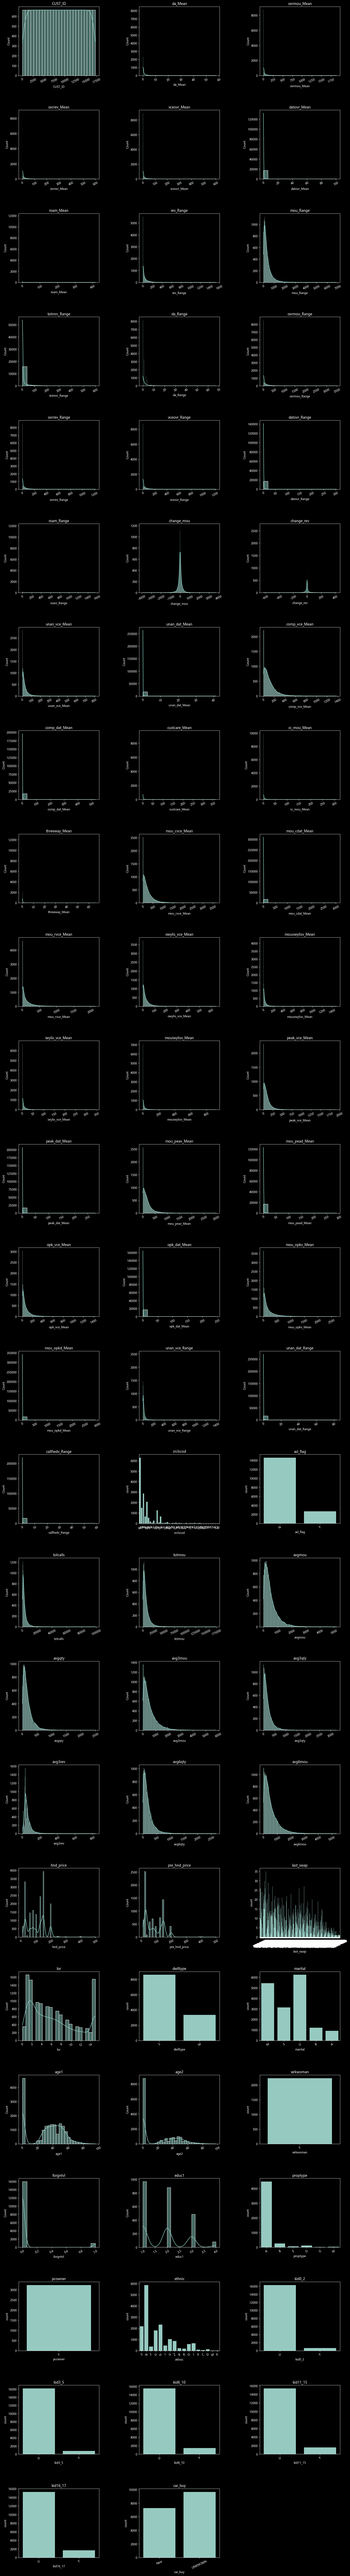

In [13]:
# plot_distribution(bank_churn)
plot_distribution(external_data)

### 数值型变量绘图分析

In [14]:
def NumVarPerf(df,col,target,truncation=False):
    '''
        :df 数据集
        :col 数值类型的列
        :target 目标列
        :truncation 是否截断(极值的处理)
    '''
    # 准备数据
    # 准备有效数据
    valid_df = df[~df[col].isnull()][[col,target]]
    # 计算有效数据的百分比
    valid_rcd = valid_df.shape[0]*1.0/df.shape[0]
    # 转换成百分比
    valid_rcd_fmt = f'{valid_rcd:.2f}'
    # 计算当前特征的统计信息
    des_stats = valid_df[col].describe()
    # 获取平均值
    mu = f'{des_stats["mean"]:.2e}'
    # 获取标准差
    std = f'{des_stats["std"]:.2e}'
    # 获取最大值
    max_val = f'{des_stats["max"]:.2e}'
    # 获取最小值
    min_val = f'{des_stats["min"]:.2e}'

    # 流失的数据
    x = valid_df[valid_df[target]==1][col]
    # 非流失客户的数据
    y = valid_df[valid_df[target]==0][col]

    # 设置权重
    xweights = 100.0* np.ones_like(x)/x.size
    yweights = 100.0* np.ones_like(y)/x.size

    # 判断是否处理极值
    if truncation:
        # 获取col列的95%分位数
        pcnt95 = np.percentile(valid_df[col],95)
        # 重新设置x的值,去掉大于95%分位数的值
        x = x.apply(lambda val:min(val,pcnt95))
        y = y.apply(lambda val:min(val,pcnt95))
    # 获取画布对象
    fig,ax = plt.subplots()
    # 将数据绘制到子图
    ax.hist(x,weights=xweights,alpha=0.5,label='流失客户')
    ax.hist(y,weights=yweights,alpha=0.5,label='非流失客户')

    # 设置标题
    title = f'特征列:{col}\n有效数据:{valid_rcd_fmt},平均值:{mu},标准差:{std},最大值:{max_val},最小值:{min_val}'
    ax.set_title(title)

    # 设置x与y轴的边缘大小
    ax.margins(0.05)
    # 设置y轴的数据从0开始
    ax.set_ylim(bottom=0)
    # 设置图例
    ax.legend(loc='upper right')
    # 显示图表
    plt.show()

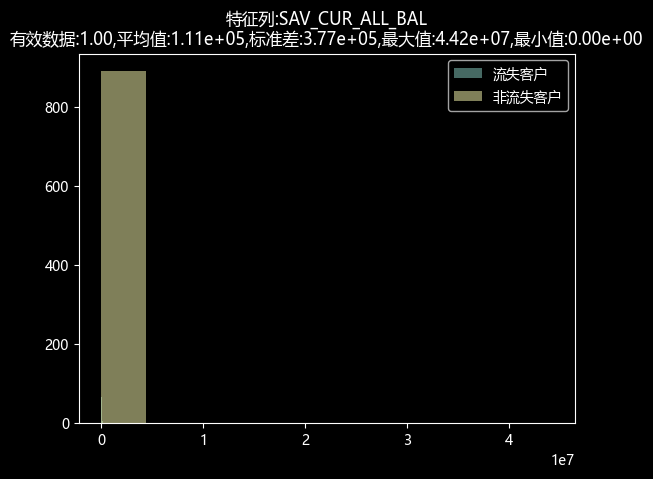

In [15]:
NumVarPerf(bank_churn,'SAV_CUR_ALL_BAL','CHURN_CUST_IND')

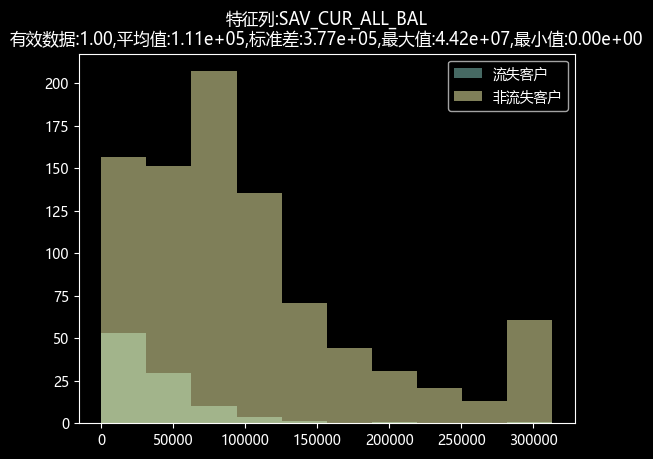

In [16]:
NumVarPerf(bank_churn,'SAV_CUR_ALL_BAL','CHURN_CUST_IND',truncation=True)

In [17]:
bank_churn['CHURN_CUST_IND'].value_counts()

CHURN_CUST_IND
0    15500
1     1741
Name: count, dtype: int64

### 字符型变量绘图分析

In [18]:
def CharVarPerf(df,col,target):
    '''
    :df 数据集
    :col 要分析的数据特征
    :target 目标列
    '''
    # 准备有效的数据
    valid_df = df[~df[col].isnull()][[col,target]]
    # 计算总数据数
    recd_num = df.shape[0]
    # 计算有效数据的百分比
    valid_rcd = valid_df.shape[0]*1.0/recd_num

    # 建立字典存储统计结果
    # 统计的每个分类占总数据的百分比
    freq_dict = {}
    # 统计每个分类的流失客百分比
    churn_dict = {}

    # 依次获取每个分类
    for v in set(valid_df[col]):
        # 获取分类的数据
        vdf = valid_df[valid_df[col]==v]
        # 计算每个类别的百分比
        freq_dict[v] = vdf.shape[0]*1.0/recd_num
        # 计算每个类别的针对自己类别 流失客户百分比
        churn_dict[v] = sum(vdf[target])/vdf.shape[0]
    
    # 将字典转换成DataFrame
    desc_stats =  pd.DataFrame({'freq':freq_dict,'churn':churn_dict})
    
    # 绘制图表
    # 创建画布
    fig = plt.figure()
    # 创建子图
    ax = fig.add_subplot()
    # 创建第2个子图，并且与第1个子图共享x轴
    ax2 = ax.twinx()
    # 设置标题
    plt.title(f'特征:{col}\n 有效数据:{valid_rcd:.2f}')
    # 绘制第1个子图
    desc_stats['freq'].plot(kind='bar',ax=ax)
    # 绘制第2个子图
    desc_stats['churn'].plot(kind='line',ax=ax2)
    # 设置Y轴的标签
    ax.set_ylabel('总数据百分比')
    ax2.set_ylabel('流失客户百分比')
    plt.show()

In [19]:
bank_churn['GENDER_CD'].value_counts()

GENDER_CD
2    8875
1    8341
z      25
Name: count, dtype: int64

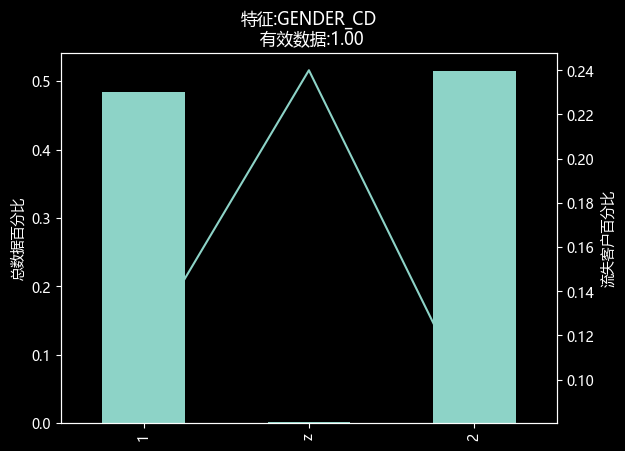

In [20]:
CharVarPerf(bank_churn,'GENDER_CD','CHURN_CUST_IND')

### 填充缺失值（针对数值型数据）

In [21]:
import random
def MakeupMissing(df,col,method,flag=True):
    '''
    :df 数据集
    :col 要处理的列
    :method 处理的方式 mean,random
    :flag 是否是数值类型
    '''
    # 判断是否是数值类型
    if not flag:
        print('非数值类型，不需要处理')
        return df[col]
    # 判断是否支持的处理方式
    if method not in ['mean','random']:
        print('不支持的处理方式')
        return df[col]
    # 判断是否有缺失值
    valid_df = df[~df[col].isnull()][[col]]
    if valid_df.shape[0]==df[col].shape[0]:
        print('没有缺失值，不需要处理')
        return df[col]

    # 处理极值
    desc_stats = valid_df[col].describe()
    # 获取平均值
    mu = desc_stats['mean']
    # 获取标准差
    std = desc_stats['std']
    # 获取最大值
    max_val = desc_stats['max']
    if max_val > mu+3*std:
        for i in list(valid_df.index):
            if valid_df.loc[i,col] > mu+3*std:
                valid_df.loc[i,col] = mu
        # 重新计算平均值
        mu = valid_df[col].mean()
    # 处理缺失值
    new_column = df[col].copy()
    if method == 'mean':
        new_column.fillna(mu,inplace=True)
    else:
        # 获取没有缺失值的数据集
        non_null_values = df[col].dropna().tolist()
        # 在数据集中随机抽取对缺失值进行填充
        new_column = new_column.apply(lambda val: random.choice(non_null_values) if pd.isna(val) else val)
    print(f'列 {col} 处理了 {df[col].isnull().sum()} 个缺失值')
    # 返回处理后的数据集
    return new_column

In [22]:
temp = MakeupMissing(external_data,'da_Mean','random',True)
temp.isnull().sum()

列 da_Mean 处理了 36 个缺失值


0

### 数字编码

In [23]:
def Encoder(df,col,target):
    '''
    :df 数据集
    :col 要处理的列
    :target 目标列
    '''
    # 创建一个字典存储统计结果
    encoder = {}
    # 获取分类的集合
    for v in set(df[col])|{None}:
        # 判断v值是否是缺失值
        if pd.notna(v):
            # 获取当前分类的所有数据
            sub_df = df[df[col]==v]
        else:
            nan_indices = df.index[df[col].isna()]
            sub_df = df.loc[nan_indices]
        # 计算流失客户的百分比
        # encoder[v] = sum(sub_df[target])*1.0/shap_df.shape[0]
        encoder[v] = sub_df[target].mean()
    # 建立一个新列new_col 来存储编码后的数据
    new_col = df[col].map(encoder)
    return new_col

### 两个变量的比

In [24]:
def ColumnDivide(df,col1,col2):
    '''
    :df 数据集
    :col1 被除数
    :col2 除数
    '''
    rate = df[col1]/df[col2].replace(0,1)
    return rate

### 处理数据

In [25]:
all_data = pd.merge(bank_churn,external_data,on='CUST_ID')

In [26]:
all_data.head()

,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,...,educ1,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,...,2.0,NaN,Y,S,U,U,U,U,U,New
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,...,NaN,NaN,NaN,N,U,U,U,U,U,New
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,...,NaN,A,Y,F,U,U,Y,U,U,New
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,...,NaN,NaN,NaN,N,U,U,U,U,U,UNKNOWN
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,...,NaN,A,Y,U,U,U,U,U,Y,New


In [27]:
# 创建一个列表，用于记录哪个列需要删除
columns_to_remove = []
# 创建一个字典，用于记录都统计了哪些列
columns_value_dict = {}
# 依次获取每一列的名称
for var in all_data.columns:
    # 判断列是否是CUST_ID or CHURN_CUST_IND
    if var == 'CUST_ID' or var == 'CHURN_CUST_IND':
        continue
    # 判断有没有处理过这个列
    if var not in columns_value_dict:
        # 判断列里面的值是不是只有1个，如果只有1个，那么这个列就没有意义
        x0 = list(set(all_data[var]))
        columns_value_dict[var] = x0

    if len(x0) == 1:
        print(f'删除只有1个值的列:{var}')
        columns_to_remove.append(var)
        continue
    # 处理数据
    # 判断列的数据类型
    if all_data[var].dtype !='object':
        if pd.isna(x0).any():
            print(f'在{var}中发现缺失值,需要处理')
            all_data[var] = MakeupMissing(all_data,var,'mean',True)
    else:
        print(f'{var}列 需要使用数值编码')
        all_data[var] = Encoder(all_data,var,'CHURN_CUST_IND')
        
# 删除无用的列
for var in columns_to_remove:
    all_data.drop(var,axis=1,inplace=True)

GENDER_CD列 需要使用数值编码
HASNT_HOME_ADDRESS_INF列 需要使用数值编码
HASNT_MOBILE_TEL_NUM_INF列 需要使用数值编码
删除只有1个值的列:TELEBANK_ALL_TX_NUM
在da_Mean中发现缺失值,需要处理
列 da_Mean 处理了 36 个缺失值
在ovrmou_Mean中发现缺失值,需要处理
列 ovrmou_Mean 处理了 36 个缺失值
在ovrrev_Mean中发现缺失值,需要处理
列 ovrrev_Mean 处理了 36 个缺失值
在vceovr_Mean中发现缺失值,需要处理
列 vceovr_Mean 处理了 36 个缺失值
在datovr_Mean中发现缺失值,需要处理
列 datovr_Mean 处理了 36 个缺失值
在roam_Mean中发现缺失值,需要处理
列 roam_Mean 处理了 36 个缺失值
在rev_Range中发现缺失值,需要处理
列 rev_Range 处理了 36 个缺失值
在mou_Range中发现缺失值,需要处理
列 mou_Range 处理了 36 个缺失值
在totmrc_Range中发现缺失值,需要处理
列 totmrc_Range 处理了 36 个缺失值
在da_Range中发现缺失值,需要处理
列 da_Range 处理了 36 个缺失值
在ovrmou_Range中发现缺失值,需要处理
列 ovrmou_Range 处理了 36 个缺失值
在ovrrev_Range中发现缺失值,需要处理
列 ovrrev_Range 处理了 36 个缺失值
在vceovr_Range中发现缺失值,需要处理
列 vceovr_Range 处理了 36 个缺失值
在datovr_Range中发现缺失值,需要处理
列 datovr_Range 处理了 36 个缺失值
在roam_Range中发现缺失值,需要处理
列 roam_Range 处理了 36 个缺失值
在change_mou中发现缺失值,需要处理
列 change_mou 处理了 88 个缺失值
在change_rev中发现缺失值,需要处理
列 change_rev 处理了 88 个缺失值
crclscod列 需要使用数值编码
asl_flag列 需要使用数值编码
在avg6qty中发现缺失值,需

### 特征工程

In [28]:
# 计算相关比，添加到新列（新特征）
# LOCAL_CUR_TRANS_TX_AMT 本币活期转账交易金额
# LOCAL_CUR_TRANS_TX_NUM 本币活期转账交易笔数
all_data['AVG_LOCAL_CUR_TRANS_TX_AMT'] = ColumnDivide(all_data, 'LOCAL_CUR_TRANS_TX_AMT','LOCAL_CUR_TRANS_TX_NUM')
# LOCAL_CUR_LASTSAV_TX_AMT 最近六个月本币活期续存交易金额
# LOCAL_CUR_LASTSAV_TX_NUM 最近六个月本币活期续存交易笔数
all_data['AVG_LOCAL_CUR_LASTSAV_TX_AMT'] = ColumnDivide(all_data, 'LOCAL_CUR_LASTSAV_TX_AMT','LOCAL_CUR_LASTSAV_TX_NUM')

In [29]:
#### 计算每个样本的指定五个列的最大值，添加到新列（新特征）volatility_max中
# LOCAL_CUR_SAV_SLOPE 本币活期储蓄波动率
# LOCAL_BELONEYR_FF_SLOPE 本币一年以下整整波动率
# LOCAL_OVEONEYR_FF_SLOPE 本币一年以上整整波动率
# LOCAL_SAV_SLOPE 本币储蓄波动率
# SAV_SLOPE 储蓄类资产波动率
max_value_features = ['LOCAL_CUR_SAV_SLOPE','LOCAL_BELONEYR_FF_SLOPE','LOCAL_OVEONEYR_FF_SLOPE','LOCAL_SAV_SLOPE','SAV_SLOPE']
# 提取每个样本的相关波动率最大值作为新的特征volatility_max
all_data['volatility_max']= all_data[max_value_features].apply(max, axis =1)

In [30]:
## 删除LOCAL_CUR_MON_AVG_BAL_PROP这个冗余特征 
# LOCAL_CUR_MON_AVG_BAL_PROP 本币活期月日均余额占比
# LOCAL_FIX_MON_AVG_BAL_PROP 本币定期月日均余额占比
# 本币活期月日均余额占比 = 1 - 本币定期月日均余额占比
del all_data['LOCAL_CUR_MON_AVG_BAL_PROP']

In [31]:
## 对指定的特征列相加，得到新的特征
# 本币活期储蓄月日均余额,本币定期月日均余额 = 总月日均余额
sumup_cols0 = ['LOCAL_CUR_MON_AVG_BAL','LOCAL_FIX_MON_AVG_BAL']
# 本币活期取款交易笔数,本币定期取款交易笔数 = 总取款交易笔数
sumup_cols1 = ['LOCAL_CUR_WITHDRAW_TX_NUM','LOCAL_FIX_WITHDRAW_TX_NUM']
# 本币活期取款交易金额,本币定期取款交易金额 = 总取款交易金额
sumup_cols2 = ['LOCAL_CUR_WITHDRAW_TX_AMT','LOCAL_FIX_WITHDRAW_TX_AMT']
# 柜面非账务类交易笔数,柜面账务类交易笔数 = 总交易笔数
sumup_cols3 = ['COUNTER_NOT_ACCT_TX_NUM','COUNTER_ACCT_TX_NUM']
# ATM总交易笔数,柜面总交易笔数 = 总交易笔数
sumup_cols4 = ['ATM_ALL_TX_NUM','COUNTER_ALL_TX_NUM']
# ATM账务类交易笔数,柜面账务类交易笔数 = 总账务类交易笔数
sumup_cols5 = ['ATM_ACCT_TX_NUM','COUNTER_ACCT_TX_NUM']
# ATM账务类交易金额,柜面账务类交易金额 = 总账务类交易金额
sumup_cols6 = ['ATM_ACCT_TX_AMT','COUNTER_ACCT_TX_AMT']
# ATM非账务类交易笔数,柜面非账务类交易笔数 = 总非账务类交易笔数
sumup_cols7 = ['ATM_NOT_ACCT_TX_NUM','COUNTER_NOT_ACCT_TX_NUM']

all_data['TOTAL_LOCAL_MON_AVG_BAL'] = all_data[sumup_cols0].apply(sum, axis = 1)
all_data['TOTAL_WITHDRAW_TX_NUM'] = all_data[sumup_cols1].apply(sum, axis = 1)
all_data['TOTAL_WITHDRAW_TX_AMT'] = all_data[sumup_cols2].apply(sum, axis = 1)
all_data['TOTAL_COUNTER_TX_NUM'] = all_data[sumup_cols3].apply(sum, axis = 1)
all_data['TOTAL_ALL_TX_NUM'] = all_data[sumup_cols4].apply(sum, axis = 1)
all_data['TOTAL_ACCT_TX_NUM'] = all_data[sumup_cols5].apply(sum, axis = 1)
all_data['TOTAL_ACCT_TX_AMT'] = all_data[sumup_cols6].apply(sum, axis = 1)
all_data['TOTAL_NOT_ACCT_TX_NUM'] = all_data[sumup_cols7].apply(sum, axis = 1)


In [32]:
## 根据指定列的比，创建新列（新特征）

# 分子列
# 本币储蓄当前总余额,储蓄当前总余额,资产当前总余额,本币取款交易笔数,本币取款交易金额,柜面非账务类交易笔数,ATM总交易笔数,ATM账务类交易金额,ATM非账务类交易笔数
numerator_cols = ['LOCAL_SAV_CUR_ALL_BAL','SAV_CUR_ALL_BAL','ASSET_CUR_ALL_BAL','LOCAL_CUR_WITHDRAW_TX_NUM','LOCAL_CUR_WITHDRAW_TX_AMT','COUNTER_NOT_ACCT_TX_NUM',
                 'ATM_ALL_TX_NUM','ATM_ACCT_TX_AMT','ATM_NOT_ACCT_TX_NUM']

# 分母列
# 本币储蓄月日均余额,储蓄月日均余额,资产月日均余额,本币取款交易笔数,本币取款交易金额,柜面总交易笔数,柜面账务类交易笔数,柜面账务类交易金额,柜面非账务类交易笔数
denominator_cols = ['LOCAL_SAV_MON_AVG_BAL','SAV_MON_AVG_BAL','ASSET_MON_AVG_BAL','TOTAL_WITHDRAW_TX_NUM','TOTAL_WITHDRAW_TX_AMT','TOTAL_COUNTER_TX_NUM',
                   'TOTAL_ACCT_TX_NUM','TOTAL_ACCT_TX_AMT','TOTAL_NOT_ACCT_TX_NUM']

new_col_name = ["RATIO_"+str(i) for i in range(len(numerator_cols))]
# 分别求比，添加新特征
'''
RATIO_0: 本币储蓄当前总余额 / 本币储蓄月日均余额
反映当前本币储蓄余额相对于平均水平的比例。

RATIO_1: 储蓄当前总余额 / 储蓄月日均余额
显示所有储蓄账户当前余额相对于平均水平的比例。

RATIO_2: 资产当前总余额 / 资产月日均余额
表示当前资产余额与平均资产余额的比例。

RATIO_3: 本币取款交易笔数 / 本币取款交易总笔数
衡量本币取款交易在所有取款交易中的比重。

RATIO_4: 本币取款交易金额 / 本币取款交易总金额
反映本币取款交易金额占所有取款交易金额的比例。

RATIO_5: 柜面非账务类交易笔数 / 柜面总交易笔数
衡量非账务类交易在柜面所有交易中的比例。

RATIO_6: ATM总交易笔数 / 柜面总交易笔数
显示ATM交易在所有柜面交易中的相对频率。

RATIO_7: ATM账务类交易金额 / 柜面账务类交易总金额
表示通过ATM进行的账务类交易金额与柜面账务类交易的比例。

RATIO_8: ATM非账务类交易笔数 / 柜面非账务类交易总笔数
反映ATM非账务类交易在柜面非账务类交易中的比重。
'''
for i in range(len(numerator_cols)):
    all_data[new_col_name[i]] = ColumnDivide(all_data, numerator_cols[i], denominator_cols[i])

### 建模

In [33]:
from sklearn.model_selection import train_test_split
# 准备数据
# 获取特征列
all_features = list(all_data.columns)
all_features.remove('CUST_ID') # 删除客户ID
all_features.remove('CHURN_CUST_IND') # 删除目标列

# 拆分数据
# x 特征 y 目标
x_train,x_test,y_train,y_test = train_test_split(all_data[all_features],all_data['CHURN_CUST_IND'],test_size=0.3,random_state=0)

In [34]:
# 建模
from sklearn.ensemble import  GradientBoostingClassifier

# 创建基于梯度提升树的分类器
gbc = GradientBoostingClassifier(random_state=0)
# 训练模型
gbc.fit(x_train,y_train)
# 预测
y_pred = gbc.predict(x_test)
# 评估
from sklearn.metrics import accuracy_score
print(f'在测试集上的准确率:{accuracy_score(y_test,y_pred)}')

在测试集上的准确率:0.9174560216508796
